# Project Proposal: Pulsar Classification
**DSCI 100 (007-34) Group Project Proposal**  
Group members:
- Elliot Saha
- Alasdair Buchanan
- Sarah Trevisan
- Minghao Li

## 1. Introduction

### 1.1 Background Information
Pulsars are high-magnetized neutron stars that spin at extremely fast speeds (Wikie). They emit radiation beams from their top and bottom. Since they are spinning at extremely accurate periods, pulsars are always used as the "clocks" in the universe. Because of this unique property, astronomers can measure the radiation within the time frame to discover new exoplanets, since exoplanets will sometimes block the propagation of radiation. The more pulsars astronomers know, the more possible they will find new exoplanets. Therefore, we need to create a model that helps to automatically identify pulsar stars.

### 1.2 Research Question
With the background information given, here is our research question:  
**How can we classify pulsar stars from other types of stars given the data from telescopes?**

### 1.3 Dataset

For this purpose, we will use [HTRU2 dataset](https://archive.ics.uci.edu/dataset/372/htru2) to perform classification for pulsar stars. HTRU2 dataset contains pulsar candidates collected during the HTRU survey.   

The dataset provides 8 columns of variables and 1 column of labels. For the 8 columns of the variables, there are 4 columns for statistical properties of integrated profile and 4 columns for the statistical properties of DM-SNR curve.  
- Integrated profile is  
- DM-SNR curve is  

## 2. Data analysis

### 2.1 Data Reading

In [1]:
# import tidyverse, repr, and tidymodels
library(tidyverse)
library(repr)
library(tidymodels)
# set random seed
set.seed(1111)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
pulsar_data <- read_csv("data/HTRU_2.csv", col_names=FALSE)
head(pulsar_data)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


As we can see from the dataset, there are 8 distinct variables and 1 target label with 17,898 observations in total.

### 2.2 Data Wrangling

We noticed the data frame does not have proper column names and the type of the label column is incorrect. Therefore, we performed the following operations to clean the data.w

In [3]:
# rename the columns according to data/Readme.txt
pulsar_data <- pulsar_data |>
    rename(profile_mean = X1,
          profile_sd = X2,
          profile_kurtosis = X3,
          profile_skewness = X4,
          DM_SNR_mean = X5,
          DM_SNR_sd = X6,
          DM_SNR_kurtosis = X7,
          DM_SNR_skewness = X8,
          pulsar_star = X9) |> 
    drop_na() |>
    # mark the label column as a categorical variable
    mutate(pulsar_star = as_factor(pulsar_star)) |>
    # pulsar_star refers to if the row is a pulsar star or not
    mutate(pulsar_star = fct_recode(pulsar_star, "true" = "1", "false" = "0"))

head(pulsar_data)

profile_mean,profile_sd,profile_kurtosis,profile_skewness,DM_SNR_mean,DM_SNR_sd,DM_SNR_kurtosis,DM_SNR_skewness,pulsar_star
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,false
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,false
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,false
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,false
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,false
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,false


We divide the entire data set into a training part and a test part. The training set is 70% of the entire dataset, while the testing set takes the other 30%.

In [4]:
pulsar_split <- initial_split(pulsar_data, prop = 0.7, strata = pulsar_star)  
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)
head(pulsar_train)
head(pulsar_test)

profile_mean,profile_sd,profile_kurtosis,profile_skewness,DM_SNR_mean,DM_SNR_sd,DM_SNR_kurtosis,DM_SNR_skewness,pulsar_star
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
102.5078,58.88243,0.46531815,-0.5150879,1.6772575,14.860146,10.576487,127.39358,false
136.7500,57.17845,-0.06841464,-0.6362384,3.6429766,20.959280,6.896499,53.59366,false
119.4844,48.76506,0.03146022,-0.1121676,0.9991639,9.279612,19.206230,479.75657,false
130.3828,39.84406,-0.15832276,0.3895404,1.2207358,14.378941,13.539456,198.23646,false
107.2500,52.62708,0.45268802,0.1703474,2.3319398,14.486853,9.001004,107.97251,false
107.2578,39.49649,0.46588196,1.1628771,4.0794314,24.980418,7.397080,57.78474,false


profile_mean,profile_sd,profile_kurtosis,profile_skewness,DM_SNR_mean,DM_SNR_sd,DM_SNR_kurtosis,DM_SNR_skewness,pulsar_star
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.69964840,3.199833,19.11043,7.975532,74.24222,false
103.01562,39.34165,0.32332837,1.05116443,3.121237,21.74467,7.735822,63.17191,false
88.72656,40.67223,0.60086608,1.12349169,1.178930,11.46872,14.269573,252.56731,false
93.57031,46.69811,0.53190485,0.41672112,1.636288,14.54507,10.621748,131.39400,false
138.17969,51.52448,-0.03185233,0.04679717,6.330268,31.57635,5.155940,26.14331,false
100.85156,51.74352,0.39383679,-0.01124074,2.841137,21.63578,8.302242,71.58437,false


### 2.3 Data Summary

In order to get more insights on the datasets, we first analyze the number of variables for classification.

In [5]:
dim(pulsar_train |>
    select(-pulsar_star))

[1] 12528     8

Therefore, we know there are 8 variables for classification, and there are 12528 observations in the training set.
Then, we calculate the number of observations in each particular class.

In [6]:
num_observations <- pulsar_train |>
    group_by(pulsar_star) |>
    summarize(num = n())
num_observations

pulsar_star,num
<fct>,<int>
false,11400
true,1128


In the training set, the category `false` has 11400 observations, while the category `true` only has 1128 observations. In this case, when we train the model, we need to be aware of the categorical imbalance in the dataset. We will resample the training set before we feed the data to the model.

### 2.4 Visualization


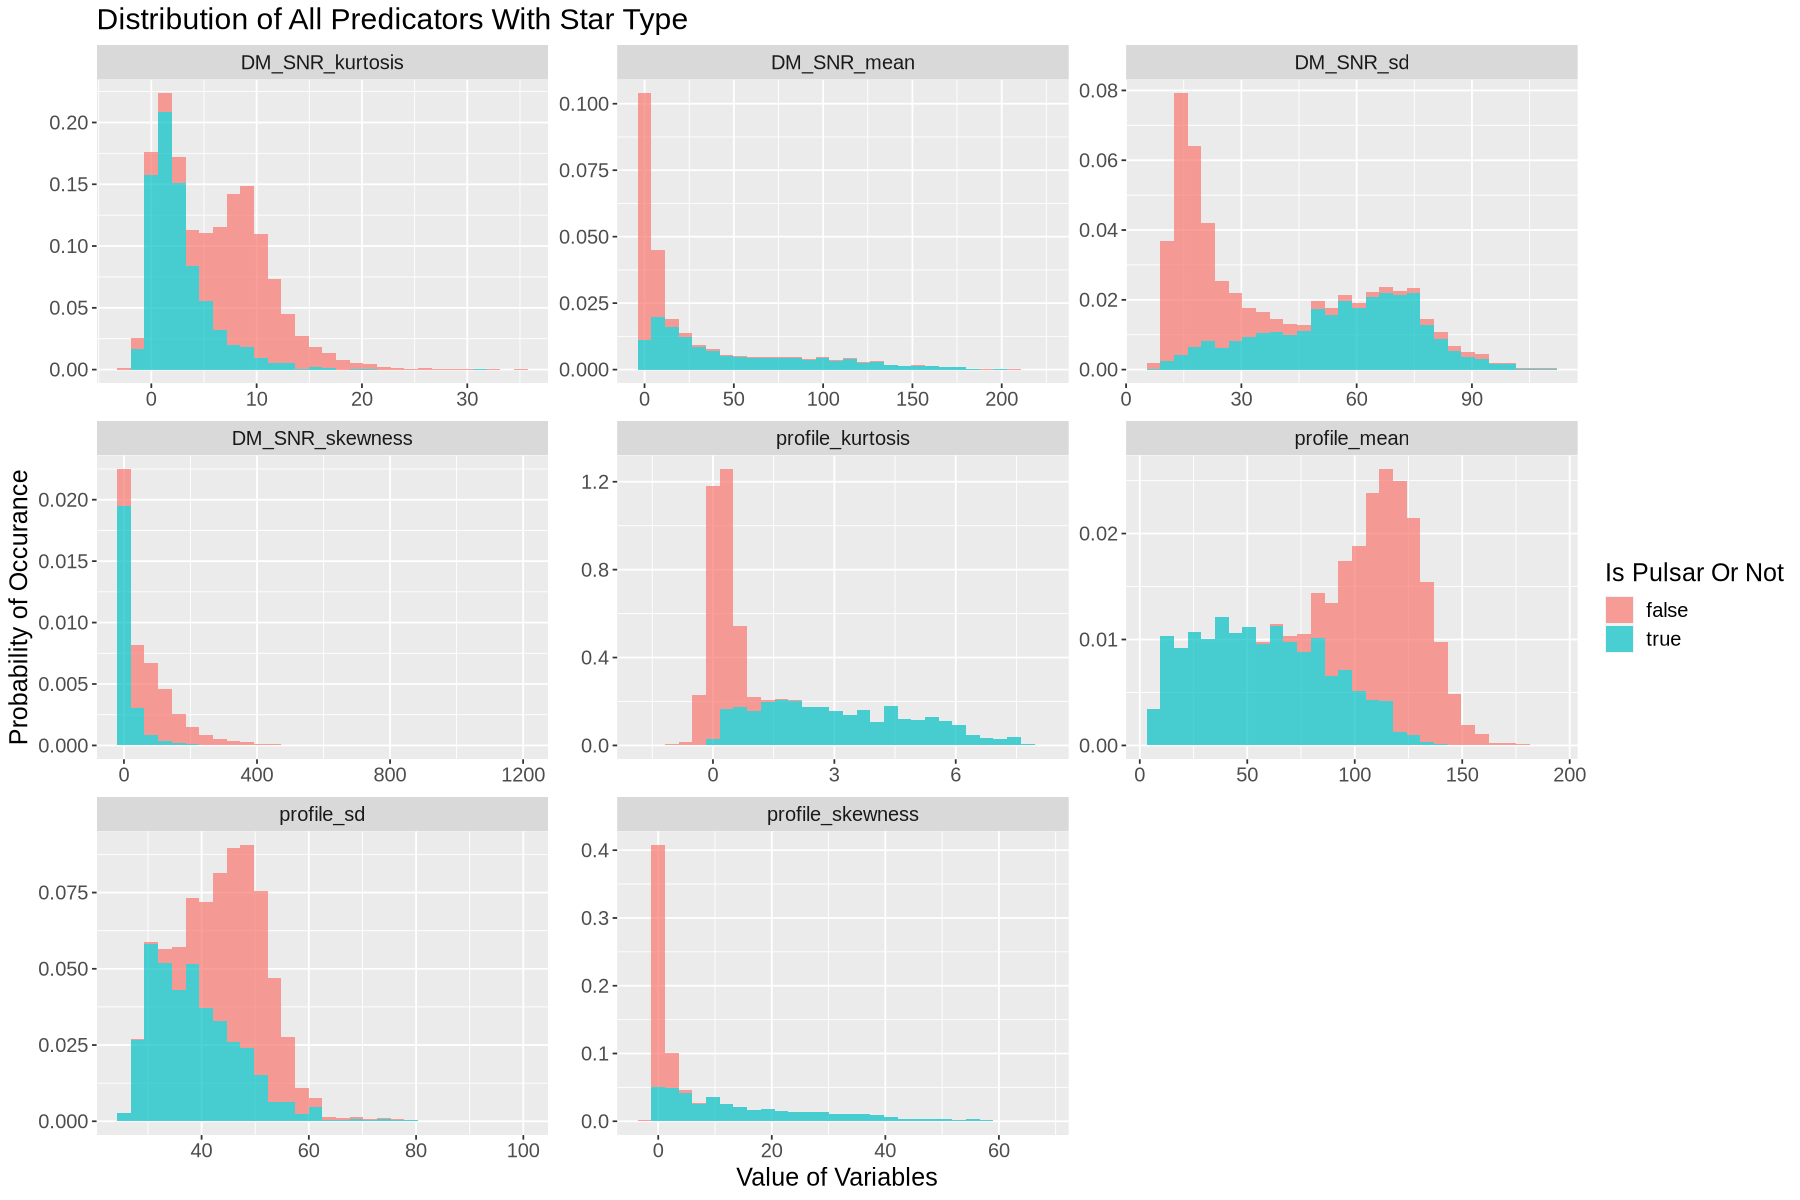

In [17]:
options(repr.plot.width = 15, repr.plot.height=10)
distribution_plot <- pulsar_train |> 
    pivot_longer(profile_mean:DM_SNR_skewness, values_to="value", names_to="variable") |>
    ggplot(aes(x = value, fill = pulsar_star, y = after_stat(density))) +
    geom_histogram(bins=30, alpha=0.7) +
    facet_wrap(vars(variable), scales = "free", labeller=labeller(sex = labels)) +
    theme(text = element_text(size=15)) +
    labs(x = "Value of Variables", y = "Probability of Occurance", fill = "Is Pulsar Or Not") +
    ggtitle("Distribution of All Predicators With Star Type")
    
distribution_plot

We visualize the distribution of all 8 predictor candidates. It is noticed that all these predictors are distributed in different shapes and they have different value ranges. Although the KNN model does not require a specific distribution of data, we still need to compress the data into a standard range by normalization.
TODO: rename every plot

## 3. Methods

## 4. Expected outcomes and significance

## 5. Citations
R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty years of pulsar candidate selection: from simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society, Volume 459, Issue 1, 11 June 2016, Pages 1104–1123, https://doi.org/10.1093/mnras/stw656
--------- TODO: write this in APA

Wikimedia Foundation. (2024, March 7). Pulsar. Wikipedia. https://en.wikipedia.org/wiki/Pulsar 